In [1]:
!unzip /content/archive.zip -d /content/

Archive:  /content/archive.zip
  inflating: /content/StudentPerformanceFactors.csv  


In [2]:
import pandas as pd
df=pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [31]:
x=df[['Hours_Studied',"Sleep_Hours","Attendance","Tutoring_Sessions"]].values
y=df['Exam_Score']

In [32]:
x

array([[23,  7, 84,  0],
       [19,  8, 64,  2],
       [24,  7, 98,  2],
       ...,
       [20,  6, 90,  3],
       [10,  6, 86,  2],
       [15,  9, 67,  0]])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(x_test)

In [36]:
y_pred

array([67.19119048, 66.39043122, 64.35620731, ..., 69.43439946,
       70.44635002, 70.5869429 ])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 5.42
R-squared (R2) Score: 0.61


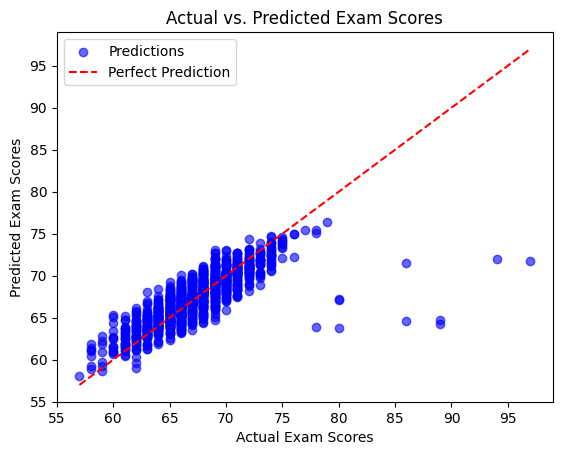

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predictions")


max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs. Predicted Exam Scores")
plt.legend()
plt.show()
